#### Importing the necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### merging the dataframe

In [5]:
customer = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_customers_dataset.csv")
geolocation = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_geolocation_dataset.csv")
order_items = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_order_items_dataset.csv")
order_payment = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_order_reviews_dataset.csv")
orders = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_orders_dataset.csv")
products = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_products_dataset.csv")
sellers =  pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\olist_sellers_dataset.csv")
products_category = pd.read_csv("C:\\Users\\kevin\\OneDrive\\Documents\\MSU\\2nd Sem\\STT 811\\project\\product_category_name_translation.csv")


In [8]:
datasets_names = ['orders', 'customer', 'order_reviews', 'order_items', 'products', 'order_payment']
for dataset in datasets_names:
    print("Dataset {} has shape {}".format(dataset, eval(dataset).shape))


Dataset orders has shape (99441, 8)
Dataset customer has shape (99441, 5)
Dataset order_reviews has shape (99224, 7)
Dataset order_items has shape (112650, 7)
Dataset products has shape (32951, 9)
Dataset order_payment has shape (103886, 5)


# Exploration

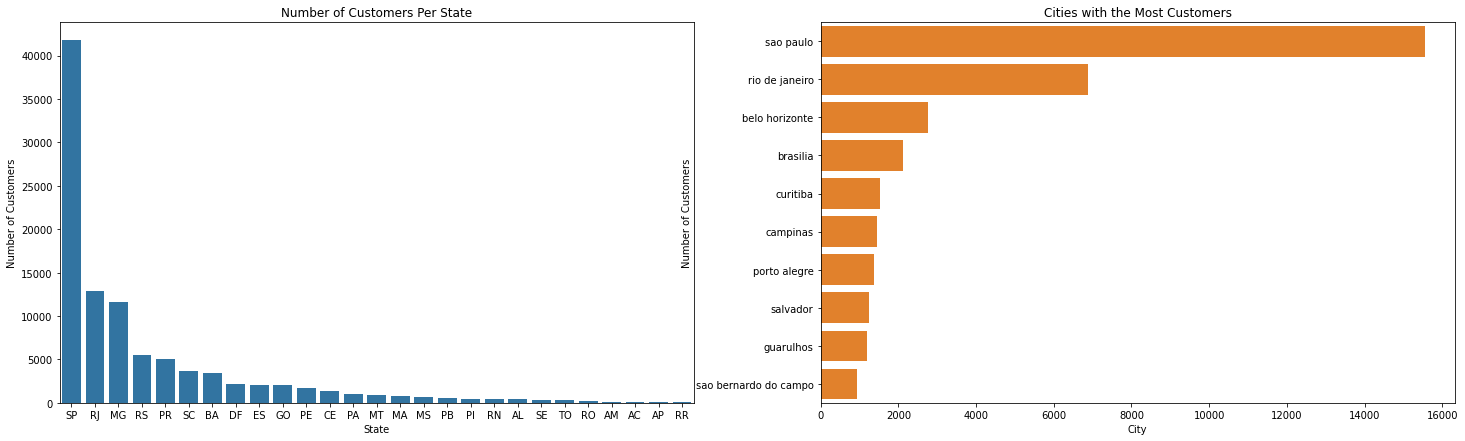

In [13]:
# area from where most customer 
import seaborn as sns
state_df = customer.groupby('customer_state').count()['customer_id'].reset_index()
city_df = customer.groupby('customer_city').count()['customer_id'].reset_index()

plt.figure(figsize = (25,7))

plt.subplot(121)
base_color = sns.color_palette()[0]

sns.barplot(data = state_df.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id', color = base_color)
plt.title('Number of Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

plt.subplot(122)
base_color = sns.color_palette()[1]

sns.barplot(data = city_df.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', y = 'customer_city', color = base_color)
plt.title('Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers');

In [10]:
# most frequent items bought

product_order_merge_df = pd.merge(order_items,products)

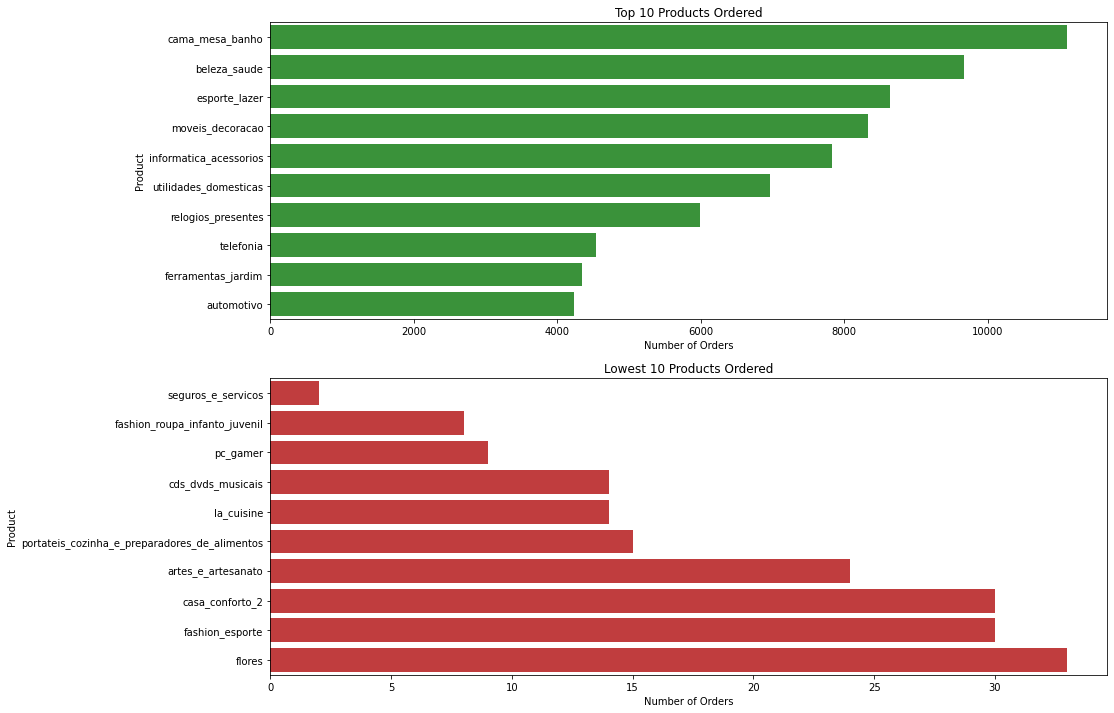

In [11]:
top_products = product_order_merge_df['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
lowest_products = product_order_merge_df['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')

plt.figure(figsize = (15,12))
red_color = sns.color_palette()[3]
green_color = sns.color_palette()[2]

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name', y = 'index', color = green_color)
plt.title('Top 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name', y = 'index', color = red_color)
plt.title('Lowest 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

In [17]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### making dataframe for predicting price

In [20]:
mdf1 = pd.merge(products,pd.merge(orders,order_items,on="order_id",how='inner'),on="product_id",how='inner')

In [22]:
mdf1.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,2018-01-31 18:55:36,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22 00:00:00,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,2018-07-09 21:18:01,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18 00:00:00,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,2018-08-03 08:55:50,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08 00:00:00,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,2018-04-11 01:06:37,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26 00:00:00,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [23]:
mdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     112650 non-null  object 
 1   product_category_name          111047 non-null  object 
 2   product_name_lenght            111047 non-null  float64
 3   product_description_lenght     111047 non-null  float64
 4   product_photos_qty             111047 non-null  float64
 5   product_weight_g               112632 non-null  float64
 6   product_length_cm              112632 non-null  float64
 7   product_height_cm              112632 non-null  float64
 8   product_width_cm               112632 non-null  float64
 9   order_id                       112650 non-null  object 
 10  customer_id                    112650 non-null  object 
 11  order_status                   112650 non-null  object 
 12  order_purchase_timestamp      

In [24]:
mdf1.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,price,freight_value
count,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,112650.000000,112650.000000,112650.000000
mean,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,1.197834,120.653739,19.990320
std,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,0.705124,183.633928,15.806405
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.850000,0.000000
25%,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,39.900000,13.080000
50%,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,74.990000,16.260000
75%,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,134.900000,21.150000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,21.000000,6735.000000,409.680000
